In [1]:
import pandas as pd
from PIL import Image
from skimage.transform import resize
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import seaborn as sns
import keras

In [2]:
# weather mapping function
def weatherName(i):
    if (i == 1):
        return "berembun"
    elif (i == 2):
        return "berkabut"
    elif (i == 3):
        return "hujan es"
    elif (i == 4):
        return "petir"
    elif (i == 5):
        return "hujan"
    elif (i == 6):
        return "pelangi"
    elif (i == 7):
        return "badai pasir"
    else:
        return "salju"

# weather code mapping function for data training
def weatherTrain(i):
    if (i < 200):
        return 1
    elif (i < 400):
        return 2
    elif (i < 600):
        return 3
    elif (i < 800):
        return 4
    elif (i < 1000):
        return 5
    elif (i < 1200):
        return 6
    elif (i < 1400):
        return 7
    else:
        return 8

# mapping for data training results (y_train)
y_train = np.array([weatherTrain(index) for index in range(0, 1600)], dtype=int)
y_train.reshape(-1,)
print(y_train.shape, y_train)


(1600,) [1 1 1 ... 8 8 8]


In [3]:
# data image preprocessing
# input training dataset to numpy array
dew = np.array([resize(np.array(Image.open('./Train/dew/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/dew')], dtype=float)

fogsmog = np.array([resize(np.array(Image.open('./Train/fogsmog/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/fogsmog')], dtype=float)

join = np.append(dew, fogsmog,  0)

hail = np.array([resize(np.array(Image.open('./Train/hail/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/hail')], dtype=float)

join = np.append(join, hail,  0)

lightning = np.array([resize(np.array(Image.open('./Train/lightning/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/lightning')], dtype=float)

join = np.append(join, lightning,  0)

rain = np.array([resize(np.array(Image.open('./Train/rain/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/rain')], dtype=float)

join = np.append(join, rain,  0)

rainbow = np.array([resize(np.array(Image.open('./Train/rainbow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/rainbow')], dtype=float)

join = np.append(join, rainbow,  0)

sandstorm = np.array([resize(np.array(Image.open('./Train/sandstorm/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/sandstorm')], dtype=float)

join = np.append(join, sandstorm,  0)

snow = np.array([resize(np.array(Image.open('./Train/snow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/snow')], dtype=float)

# mapping for data training (X_train)
X_train = np.append(join, snow,  0)

# check data training shape
print(X_train.shape, y_train.shape)

(1600, 150, 200, 3) (1600,)


In [4]:
# cnn model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),  
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# using adam for optimizer function and sparse categorical crossentropy for loss function 
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
              
# using 20 epochs
history = cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
50/50 [==============================] - 25s 486ms/step - loss: 1.6005 - accuracy: 0.4313
Epoch 2/20
50/50 [==============================] - 24s 482ms/step - loss: 1.0373 - accuracy: 0.6544
Epoch 3/20
50/50 [==============================] - 24s 490ms/step - loss: 0.8892 - accuracy: 0.7031
Epoch 4/20
50/50 [==============================] - 24s 477ms/step - loss: 0.8137 - accuracy: 0.7337
Epoch 5/20
50/50 [==============================] - 24s 471ms/step - loss: 0.7238 - accuracy: 0.7600
Epoch 6/20
50/50 [==============================] - 23s 465ms/step - loss: 0.6547 - accuracy: 0.7881
Epoch 7/20
50/50 [==============================] - 23s 463ms/step - loss: 0.5637 - accuracy: 0.7962
Epoch 8/20
50/50 [==============================] - 23s 464ms/step - loss: 0.4659 - accuracy: 0.8450
Epoch 9/20
50/50 [==============================] - 23s 461ms/step - loss: 0.4347 - accuracy: 0.8469
Epoch 10/20
50/50 [==============================] - 23s 464ms/step - loss: 0.3708 - accura

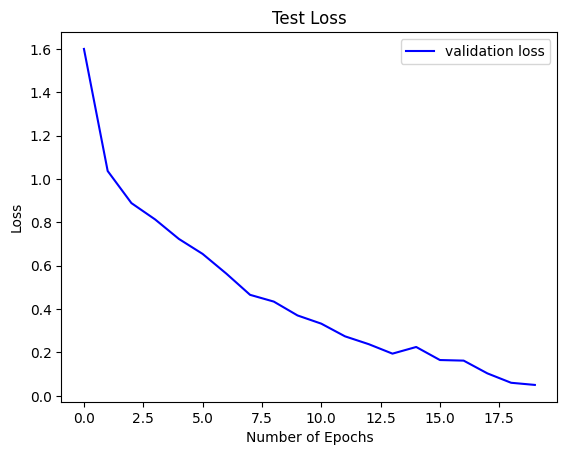

In [5]:
# evaluate loss
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# weather code mapping function for data testing
def weatherTest(i):
    if (i < 20):
        return 1
    elif (i < 40):
        return 2
    elif (i < 60):
        return 3
    elif (i < 80):
        return 4
    elif (i < 100):
        return 5
    elif (i < 120):
        return 6
    elif (i < 140):
        return 7
    else:
        return 8

# mapping for data testing results (X_train)
y_test = np.array([weatherTest(index) for index in range(0, 160)], dtype=int)
y_test.reshape(-1,)
print(y_test.shape)
y_test